In [331]:
import ipdb
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from utils import u_darrays as uda

pylab.rcParams['figure.figsize'] = (50., 50.)
%matplotlib inline

In [330]:
cd ..

/home/ck/pythonWorkspace


In [343]:
ffile = xr.open_dataset('/media/ck/Elements/global/gridded_datasets/ndvi/monthly/MOD13C2.A2017032.006.2017066084614.hdf')

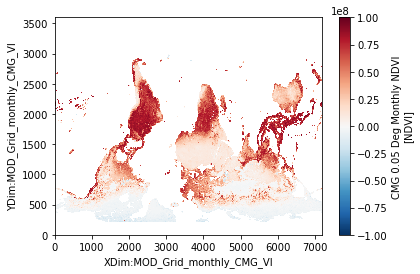

In [345]:
ffile['CMG 0.05 Deg Monthly NDVI'].plot()

In [332]:
nfile = xr.open_dataset('/home/ck/Desktop/AVHRR-Land_v005_AVH13C1_NOAA-18_20060104_c20170331133114.nc')

In [333]:
nfile = uda.flip_lat(nfile)

In [334]:
domain = nfile.sel(longitude=slice(-85,-40), latitude=slice(-30,0)).squeeze()

In [335]:
domain

<xarray.Dataset>
Dimensions:    (latitude: 600, longitude: 900, nv: 2)
Coordinates:
  * latitude   (latitude) float32 -29.975006 -29.925003 ... -0.025001526
  * longitude  (longitude) float32 -84.975 -84.924995 ... -40.074997 -40.02501
    time       datetime64[ns] 2006-01-04
Dimensions without coordinates: nv
Data variables:
    crs        int16 ...
    lat_bnds   (latitude, nv) float32 ...
    lon_bnds   (longitude, nv) float32 ...
    NDVI       (latitude, longitude) float32 ...
    TIMEOFDAY  (latitude, longitude) datetime64[ns] ...
    QA         (latitude, longitude) int16 ...
Attributes:
    title:                                  Normalized Difference Vegetation ...
    institution:                            NASA/GSFC/SED/ESD/HBSL/TIS/MODIS-...
    Conventions:                            CF-1.6, ACDD-1.3
    standard_name_vocabulary:               CF Standard Name Table (v25, 05 J...
    naming_authority:                       gov.noaa.ncei
    license:                                See the Use Agreement for this CD...
    cdm_data_type:                          Grid
    time_coverage_start:                    2006-01-04T00:00:00Z
    time_coverage_end:                      2006-01-04T23:59:59Z
    product_version:                        v5r0
    platform:                               NOAA-18 > National Oceanic & Atmo...
    sensor:                                 AVHRR > Advanced Very High Resolu...
    keywords_vocabulary:                    NASA Global Change Master Directo...
    platform_vocabulary:                    Global Change Master Directory (G...
    instrument_vocabulary:                  Global Change Master Directory (G...
    keywords:                               EARTH SCIENCE > BIOSPHERE > VEGET...
    source:                                 NSS.GHRR.NN.D06003.S2321.E0111.B0...
    date_created:                           2017-03-31T13:31:14Z
    spatial_resolution:                     0.050000 degrees per pixel
    geospatial_lat_min:                     -90.0
    geospatial_lat_max:                     90.0
    geospatial_lon_min:                     -180.0
    geospatial_lon_max:                     180.0
    metadata_link:                          https://doi.org/10.7289/V5ZG6QH9
    program:                                NOAA Climate Data Record Program ...
    cdr_variable:                           NDVI
    Process:                                LTDR_GAPS
    PostProcessingVersion:                  2.9
    PFIIVersion:                            3.5.45
    Satellite:                              NOAA-18
    Instrument:                             AVHRR
    InputDataType:                          GAC
    summary:                                AVHRR GAC data from NOAA-18 for 2...
    ProductionDate:                         2017-03-31T13:31:14.000000Z
    ESDT:                                   AVH13C1
    LocalGranuleId:                         AVHRR-Land_v005_AVH13C1_NOAA-18_2...
    id:                                     AVHRR-Land_v005_AVH13C1_NOAA-18_2...
    RangeBeginningDate:                     2006-004
    RangeBeginningTime:                     00:00:00.0000
    RangeEndingDate:                        2006-004
    RangeEndingTime:                        23:59:59.9999
    PercentMissingData:                     15.61
    PercentValidDaytimeData:                33.94
    PercentValidDaytimeLand:                33.94
    PercentValidClearDaytimeLand:           3.77
    PercentValidDaytimeLandInCloudShadow:   0.72
    PercentValidClearDaytimeWater:          0.00
    PercentValidDaytimeWaterInCloudShadow:  0.00

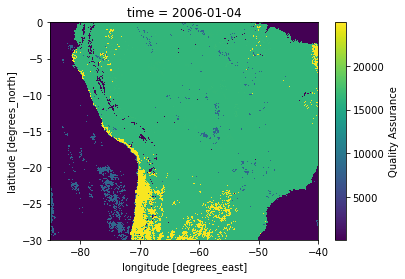

In [341]:
domain['QA'].plot()

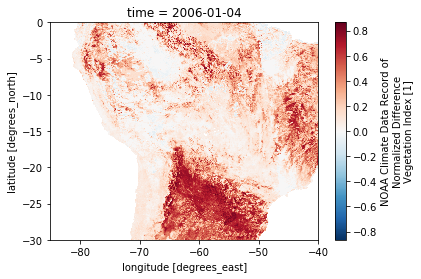

In [342]:
domain['NDVI'].plot()

In [337]:
flags = domain['QA'].values.astype(int)

In [338]:
flags.shape

(600, 900)

In [346]:
#extract oceanflag map, bit position counted backwards i.e. -2 = cloud, -4 = water mask
cloud_mask = []
bit_position = -2
for b, i in zip(np.nditer(flags), range(flags.size)):
    bb = np.flip('{0:016b}'.format(int(b)))  #16bit
    #print(bb)   # bit printout for test
    cloud_mask.append(int(bb[bit_position])) 
cloud_mask = np.reshape(np.array(cloud_mask), flags.shape)

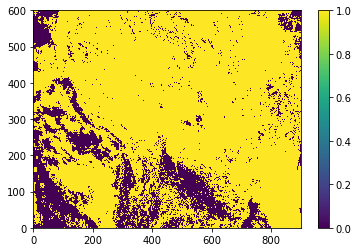

In [347]:
plt.figure()
plt.pcolormesh(cloud_mask)
plt.colorbar()